In [1]:
#!pip install kornia
#!pip install opencv-python

### IPM: calculate homography using 4-point reference

In [107]:
import numpy as np
np.set_printoptions(suppress=True)
src = np.float32([[36,174] ,[124,174],[112,189],[0,185]])
dst = np.float32([[350,365], [380,365],[380,381], [349,379]])
M = cv2.getPerspectiveTransform(src, dst) # The transformation matrix

In [108]:
M

array([[ -0.20059611,  -2.78444926, 402.79580906],
       [ -0.10948645,  -3.01761699, 436.27619541],
       [ -0.00029996,  -0.00714516,   1.        ]])

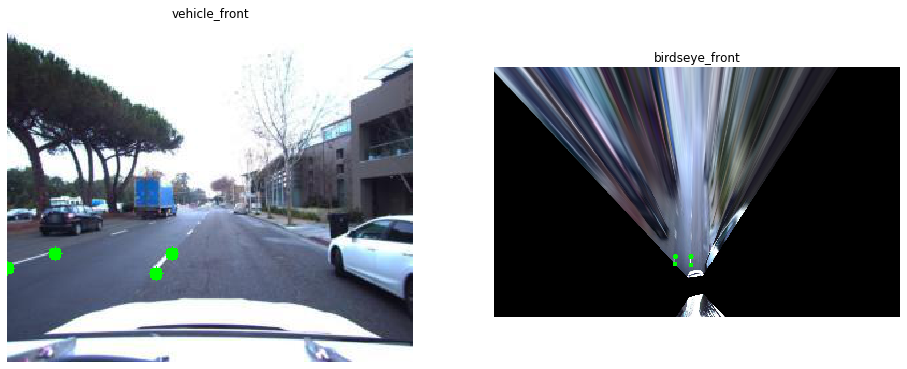

In [103]:
#Test how good the BEV
img_f = cv2.imread('/Users/nhuang37/Desktop/NYU DS/Yr 2 Sem2/DL/Final project/kornia/examples/homography_regression/data/fig2.jpeg')
warped_img = cv2.warpPerspective(img_f, M, (784,482)) # Image warping

# draw points into original image

for i in range(4):
    center = tuple(src[i])
    img_f = cv2.circle(img_f.copy(), center, 5, (0, 255, 0), -1)
    center_dst = tuple(dst[i])
    warped_img = cv2.circle(warped_img.copy(), center_dst, 5, (0, 255, 0), -1)
    

# create the plot
fig, axs = plt.subplots(1, 2, figsize=(16, 10))
axs = axs.ravel()

axs[0].axis('off')
axs[0].set_title('vehicle_front')
axs[0].imshow(cv2.cvtColor(img_f, cv2.COLOR_BGR2RGB))

axs[1].axis('off')
axs[1].set_title('birdseye_front')
axs[1].imshow(cv2.cvtColor(warped_img, cv2.COLOR_BGR2RGB))
    


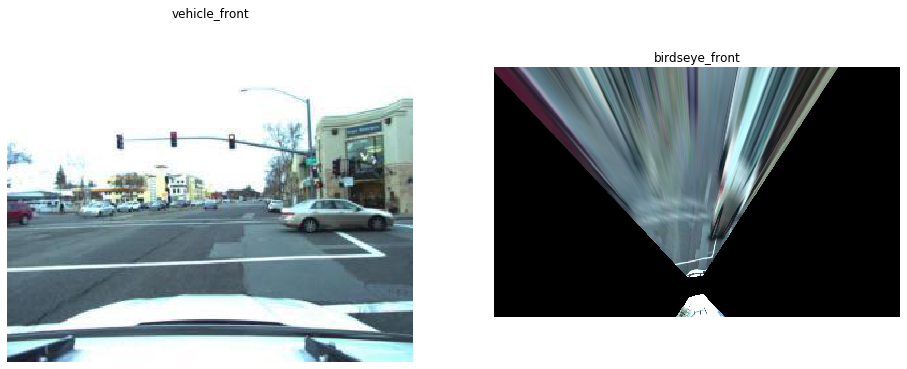

In [104]:
#new test image
img_f3 = cv2.imread('/Users/nhuang37/Desktop/NYU DS/Yr 2 Sem2/DL/Final project/kornia/examples/homography_regression/data/fig3.jpeg')

warped_img3 = cv2.warpPerspective(img_f3, M, (784,482)) # Image warping
# create the plot
fig, axs = plt.subplots(1, 2, figsize=(16, 10))
axs = axs.ravel()

axs[0].axis('off')
axs[0].set_title('vehicle_front')
axs[0].imshow(cv2.cvtColor(img_f3, cv2.COLOR_BGR2RGB))

axs[1].axis('off')
axs[1].set_title('birdseye_front')
axs[1].imshow(cv2.cvtColor(warped_img3, cv2.COLOR_BGR2RGB))
    

In [117]:
#another try:
src = np.float32([[94,192], [223,193], [252,217],[65,216]])
dst = np.float32( [[287,408],[326,408],[326,424],[287,424]])
M = cv2.getPerspectiveTransform(src, dst) # The transformation matrix
M

array([[ -0.08845641,  -2.23411806, 324.77894308],
       [  0.04191196,  -3.35332144, 479.98669127],
       [  0.00009557,  -0.00729648,   1.        ]])

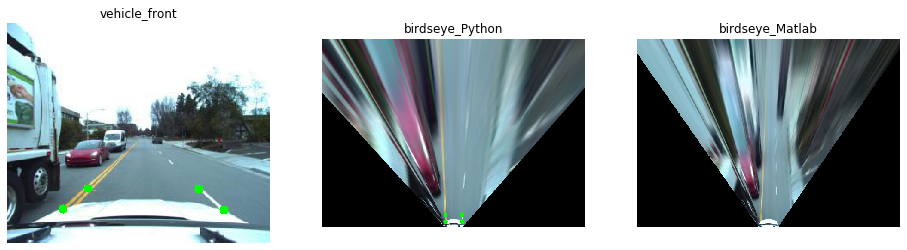

In [118]:
#Test how good the BEV
img_f4 = cv2.imread('/Users/nhuang37/Desktop/NYU DS/Yr 2 Sem2/DL/Final project/kornia/examples/homography_regression/data/CAM_FRONT.jpeg')
img_IPM = cv2.imread('/Users/nhuang37/Desktop/NYU DS/Yr 2 Sem2/DL/Final project/kornia/examples/homography_regression/data/CAM_FRONT_IPM.png')
warped_img4 = cv2.warpPerspective(img_f4, M, (612,437)) # Image warping

# draw points into original image

for i in range(4):
    center = tuple(src[i])
    img_f4 = cv2.circle(img_f4.copy(), center, 5, (0, 255, 0), -1)
    center_dst = tuple(dst[i])
    warped_img4 = cv2.circle(warped_img4.copy(), center_dst, 5, (0, 255, 0), -1)
    

# create the plot
fig, axs = plt.subplots(1, 3, figsize=(16, 10))
axs = axs.ravel()

axs[0].axis('off')
axs[0].set_title('vehicle_front')
axs[0].imshow(cv2.cvtColor(img_f4, cv2.COLOR_BGR2RGB))

axs[1].axis('off')
axs[1].set_title('birdseye_Python')
axs[1].imshow(cv2.cvtColor(warped_img4, cv2.COLOR_BGR2RGB))


axs[2].axis('off')
axs[2].set_title('birdseye_Matlab')
axs[2].imshow(cv2.cvtColor(img_IPM, cv2.COLOR_BGR2RGB))
   


### TBC: camera distortion

In [63]:
import numpy as np
camera = {'intrinsics': 
{'CAM_FRONT_LEFT': np.array([[879.03824732/4   ,0.         ,613.17597314/4],
 [  0.         ,879.03824732/4 ,524.14407205/4],
 [  0.           ,0.           ,1.        ]]),
'CAM_FRONT' : np.array([[882.61644117/4   ,0.         ,621.63358525/4],
 [  0.         ,882.61644117/4 ,524.38397862/4],
 [  0.           ,0.           ,1.        ]]),
'CAM_FRONT_RIGHT' : np.array([[880.41134027/4   ,0.         ,618.9494972/4],    
 [  0.         ,880.41134027/4 ,521.38918482/4],
 [  0.           ,0.           ,1.        ]]),       
'CAM_BACK_LEFT' : np.array([[881.28264688/4   ,0.         ,612.29732111/4],
 [  0.         ,881.28264688/4 ,521.77447199/4],
 [  0.           ,0.           ,1.        ]]),
'CAM_BACK' : np.array([[882.93018422/4   ,0.         ,616.45479905/4],
 [  0.         ,882.93018422/4 ,528.27123027/4],
 [  0.           ,0.           ,1.        ]]),
'CAM_BACK_RIGHT' : np.array([[881.63835671/4   ,0.         ,607.66308183/4],
 [  0.         ,881.63835671/4 ,525.6185326/4],          
 [  0.           ,0.           ,1.        ]])
},
'quaternions' :
{'CAM_FRONT_LEFT': np.array([ 0.68316462 ,-0.68338771  ,0.17581486 ,-0.18799863]),
 'CAM_FRONT' : np.array([ 0.50745829 ,-0.49812866  ,0.49496606 ,-0.49934369]),
 'CAM_FRONT_RIGHT' : np.array([-0.19470424  ,0.17808752 ,-0.68312934  ,0.68095909]),
 'CAM_BACK_LEFT' : np.array([-0.67797289  ,0.6871698   ,0.19201452 ,-0.1768143 ]),
 'CAM_BACK' : np.array([-0.49033062  ,0.50741961  ,0.50819262 ,-0.49379061]),
 'CAM_BACK_RIGHT' : np.array([-0.17126042  ,0.1897148   ,0.68851343 ,-0.6786766 ])
},
'translations' :
{'CAM_FRONT_LEFT': np.array([1.28400265 ,0.31639086 ,1.67877024]),
 'CAM_FRONT' : np.array([1.50612211 ,-0.03602647  ,1.69421848]),
 'CAM_FRONT_RIGHT' : np.array([1.27320628 ,-0.31664681  ,1.68114556]),
 'CAM_BACK_LEFT' : np.array([1.04338732 ,0.31565584 ,1.66400371]),
 'CAM_BACK' : np.array([ 0.81558292 ,-0.00559198  ,1.65395645]),
 'CAM_BACK_RIGHT' : np.array([ 1.04116266 ,-0.31121292  ,1.66718288])
}
         }

In [43]:
mtx = camera['intrinsics']['CAM_FRONT']
dist = np.zeros(4)#parameters["dist"]
# rvecs = parameters["rvecs"]
# tvecs = parameters["tvecs"]

h,  w = image_front.shape[:2] #get the size of images
newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,np.zeros(4),(w,h),1,(w,h))

# undistort
dst = cv2.undistort(image_front, mtx, dist, None, newcameramtx)


In [46]:
(image_front == dst).all()

True

In [22]:
image_front[130:215, :].shape

(85, 306, 3)

### Kornia IPM

In [55]:
#load one example image
import cv2
import torch
import kornia
import matplotlib.pyplot as plt
%matplotlib inline


In [56]:
from os import listdir
from os.path import isfile, join
mypath = '/Users/nhuang37/Desktop/NYU DS/Yr 2 Sem2/DL/Final project/kornia/examples/homography_regression/sample_0'
images = [join(mypath, f) for f in listdir(mypath) if "._" not in f] #exclude temp files

In [57]:
images

['/Users/nhuang37/Desktop/NYU DS/Yr 2 Sem2/DL/Final project/kornia/examples/homography_regression/sample_0/CAM_FRONT_RIGHT.jpeg',
 '/Users/nhuang37/Desktop/NYU DS/Yr 2 Sem2/DL/Final project/kornia/examples/homography_regression/sample_0/ego.png',
 '/Users/nhuang37/Desktop/NYU DS/Yr 2 Sem2/DL/Final project/kornia/examples/homography_regression/sample_0/CAM_BACK_LEFT.jpeg',
 '/Users/nhuang37/Desktop/NYU DS/Yr 2 Sem2/DL/Final project/kornia/examples/homography_regression/sample_0/CAM_FRONT_LEFT.jpeg',
 '/Users/nhuang37/Desktop/NYU DS/Yr 2 Sem2/DL/Final project/kornia/examples/homography_regression/sample_0/CAM_BACK.jpeg',
 '/Users/nhuang37/Desktop/NYU DS/Yr 2 Sem2/DL/Final project/kornia/examples/homography_regression/sample_0/CAM_FRONT.jpeg',
 '/Users/nhuang37/Desktop/NYU DS/Yr 2 Sem2/DL/Final project/kornia/examples/homography_regression/sample_0/CAM_BACK_RIGHT.jpeg']

In [58]:
ego = cv2.imread(images[1])[..., (2,1,0)]

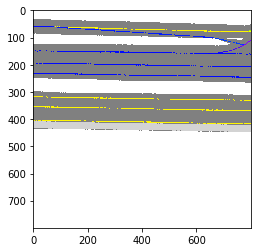

In [59]:
plt.imshow(ego)
plt.show()

In [60]:
image_front = cv2.imread(images[5])[..., (2,1,0)]

In [61]:
image_front.shape

(256, 306, 3)

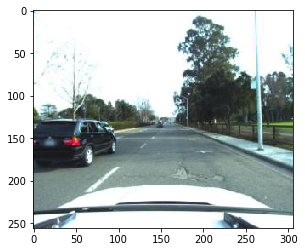

In [62]:
plt.imshow(image_front)
#plt.imshow(image_front[130:215, :])

In [65]:
def IPM(image, view_title, location):
    '''
    takes in an image (array), view_title (string), and a list of location list - 
    [[topleft_x, topleft_y], [topright_x,topright_y], [bottomright_x, bottomright_y],[bottomleft_x, bottomleft_y] 
    apply inverse perspective transform, plot out
    return original image (with points), top-view image
    '''
    img = kornia.image_to_tensor(image)
    img = torch.unsqueeze(img.float(), dim=0)  # BxCxHxW
    points_src = torch.FloatTensor([location])
    #print(img.shape)
    # the destination points are the image vertexes
    h, w = 400,156#256, 305  # destination size #!!!could change

    points_dst = torch.FloatTensor([[
        [0, 0], [w - 1, 0], [w - 1, h - 1], [0, h - 1],
    ]])

    # compute perspective transform
    M = kornia.get_perspective_transform(points_src, points_dst)

    # warp the original image by the found transform
    img_warp = kornia.warp_perspective(img, M, dsize=(h, w))

    # convert back to numpy
    image_warp = kornia.tensor_to_image(img_warp.byte()[0])

    # draw points into original image
    for i in range(4):
        center = tuple(points_src[0, i].long().numpy())
        image = cv2.circle(image.copy(), center, 5, (0, 255, 0), -1)
    
    # create the plot
    fig, axs = plt.subplots(1, 2, figsize=(16, 10))
    axs = axs.ravel()

    axs[0].axis('off')
    axs[0].set_title('vehicle_'+view_title)
    axs[0].imshow(image)

    axs[1].axis('off')
    axs[1].set_title('birdseye_'+view_title)
    axs[1].imshow(image_warp)
    
    return M, image, image_warp

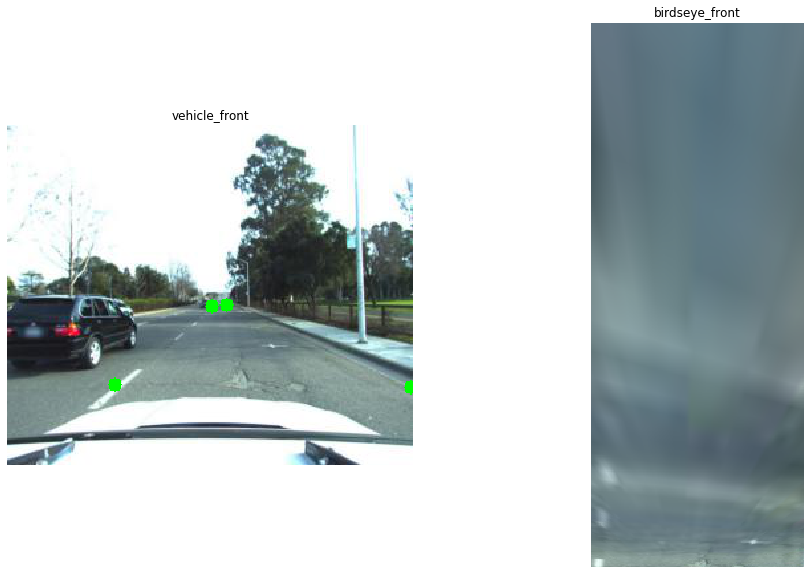

In [66]:
image = cv2.imread(images[5])[..., (2,1,0)]
M, image, image_warp = IPM(image, 'front',[[154,136],[165,135],[304,197],[81,195]])#[[138, 140], [156, 140], [303, 255], [0, 255]])

(tensor([[[-6.4280e-01, -7.3896e-01,  1.8844e+02],
          [-3.0451e-07, -3.9478e+00,  5.0532e+02],
          [-9.6211e-10, -8.8493e-03,  1.0000e+00]]]), array([[[ 62, 114, 162],
         [ 70, 120, 181],
         [ 84, 126, 210],
         ...,
         [188, 242, 244],
         [194, 237, 254],
         [193, 236, 253]],
 
        [[ 64, 113, 179],
         [ 75, 122, 190],
         [ 88, 132, 205],
         ...,
         [190, 241, 245],
         [194, 240, 255],
         [193, 239, 255]],
 
        [[ 59, 102, 194],
         [ 73, 116, 194],
         [ 87, 132, 189],
         ...,
         [193, 241, 251],
         [190, 239, 254],
         [188, 237, 252]],
 
        ...,
 
        [[  0, 255,   0],
         [  0, 255,   0],
         [  0, 255,   0],
         ...,
         [  0, 255,   0],
         [  0, 255,   0],
         [  0, 255,   0]],
 
        [[  0, 255,   0],
         [  0, 255,   0],
         [  0, 255,   0],
         ...,
         [  0, 255,   0],
         [  0, 255, 

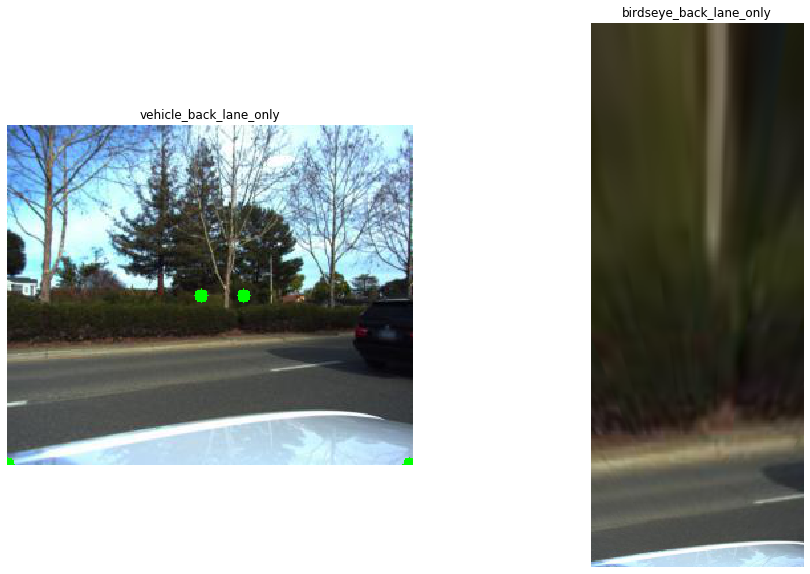

In [67]:
#Back-view: keep a single lane would cut off other cars
image = cv2.imread(images[3])[..., (2,1,0)]
IPM(image,'back_lane_only',[[146, 128], [178, 128], [303, 255], [0, 255]])

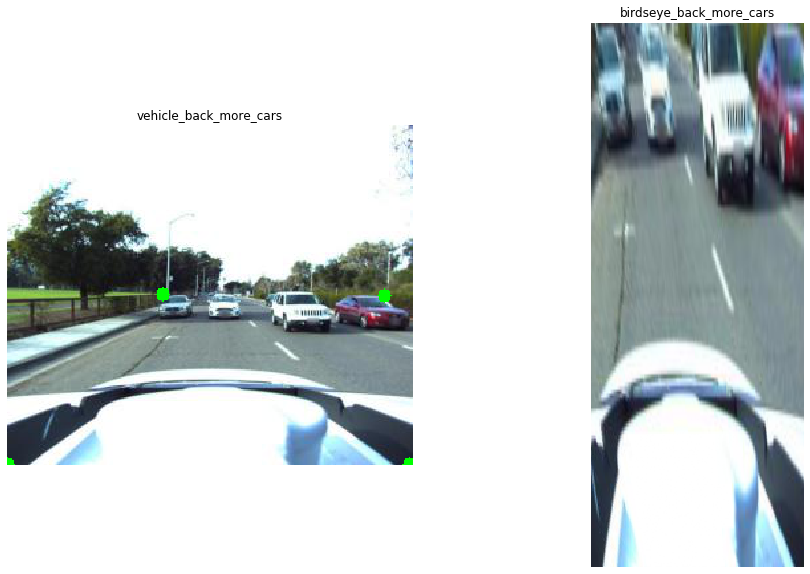

In [9]:
#Back-view: keep all the cars in view will distort the transform
image = cv2.imread(images[3])[..., (2,1,0)]
IPM(image,'back_more_cars',[[117, 127], [284, 128], [303, 255], [0, 255]])

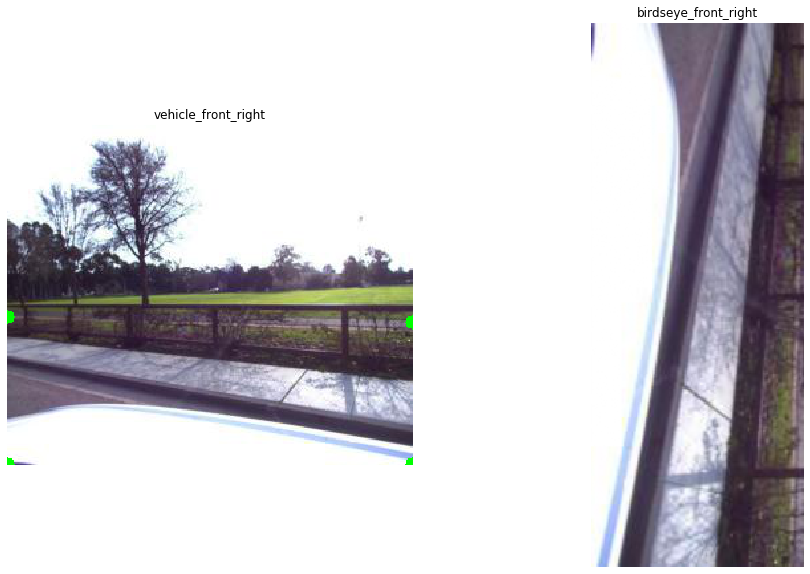

In [10]:
#Not so trivial: we want to capture the extra line on the right, but this will confuse the perspective somehow
image = cv2.imread(images[1])[..., (2,1,0)]
IPM(image, 'front_right',[[0, 255], [0, 144], [305, 148], [305, 255]])

### take-away:
- we should learn the source points / destination points (but keeping the whole image would allow us see ALL stuff?)
- we should learn homography matrix (see another notebook: homography_new) 
  - implemented in Kornia library (with Pytorch backend)
  - differentiable!
  - using idea of Gaussian Pyramid